# Analysing the density of table tennis tables in German cities

## Setup

In [6]:
# Install dependencies.
!pip install overpy
!pip install pandas
!pip install seaborn
!pip install matplotlib

import overpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(18,10)}, font_scale=2)

In [29]:
# Initialize overpass API.
api = overpy.Overpass()

NB_OF_TABLE_TENNIS_TABLES_IN_AREA = """
area[name="{area_name}"]->.searchArea;
(
  node["leisure"="pitch"]["sport"="table_tennis"]["access"!="private"](area.searchArea);
  way["leisure"="pitch"]["sport"="table_tennis"]["access"!="private"](area.searchArea);
  relation["leisure"="pitch"]["sport"="table_tennis"]["access"!="private"](area.searchArea);
);
out body;
>;
out skel qt;
"""


def get_nb_of_table_tennis_tables(area_name: str) -> int:
  """Asks overpass (OSM) for the number of public table tennis tables in the area."""
  result = api.query(NB_OF_TABLE_TENNIS_TABLES_IN_AREA.format(area_name=area_name))
  print(
      f"Found {len(result.nodes)} nodes, {len(result.ways)} ways and {len(result.relations)} relations in {area_name}."
  )
  return len(result.nodes) + len(result.ways) + len(result.relations)

## Analysis of German States

In [31]:
# Data from Statistische Bundesamt  (Statistikcode: 12411-0010).
states = pd.read_csv(
    filepath_or_buffer="data/12411-0010-Bevoelkerung_Bundeslaender.csv",
    sep=";",
    encoding='iso-8859-1',
    usecols=["1_Auspraegung_Label", "BEVSTD__Bevoelkerungsstand__Anzahl"]
)
states.rename(columns={
    "1_Auspraegung_Label": "Bundesland",
    "BEVSTD__Bevoelkerungsstand__Anzahl": "nb_of_citizens"
}, inplace=True)
states.set_index(keys="Bundesland", inplace=True)
states

,nb_of_citizens
Bundesland,
Baden-Württemberg,11280257
Bayern,13369393
Berlin,3755251
Brandenburg,2573135
Bremen,684864
Hamburg,1892122
Hessen,6391360
Mecklenburg-Vorpommern,1628378
Niedersachsen,8140242


In [32]:
# Query overpass for each state.
for state_name, row in states.iterrows():
    states.at[state_name, "nb_of_tables"] = get_nb_of_table_tennis_tables(area_name=state_name)

states

Found 3051 nodes, 401 ways and 1 relations in Baden-Württemberg.
Found 3094 nodes, 457 ways and 0 relations in Bayern.
Found 2522 nodes, 224 ways and 0 relations in Berlin.
Found 608 nodes, 68 ways and 0 relations in Brandenburg.
Found 115 nodes, 7 ways and 0 relations in Bremen.
Found 493 nodes, 63 ways and 0 relations in Hamburg.
Found 1353 nodes, 181 ways and 0 relations in Hessen.
Found 278 nodes, 32 ways and 0 relations in Mecklenburg-Vorpommern.
Found 1152 nodes, 147 ways and 0 relations in Niedersachsen.
Found 7398 nodes, 1178 ways and 0 relations in Nordrhein-Westfalen.
Found 596 nodes, 76 ways and 0 relations in Rheinland-Pfalz.
Found 123 nodes, 11 ways and 0 relations in Saarland.
Found 1553 nodes, 215 ways and 1 relations in Sachsen.
Found 355 nodes, 53 ways and 0 relations in Sachsen-Anhalt.
Found 404 nodes, 57 ways and 0 relations in Schleswig-Holstein.
Found 788 nodes, 152 ways and 0 relations in Thüringen.


,nb_of_citizens,nb_of_tables
Bundesland,,
Baden-Württemberg,11280257,3453.0
Bayern,13369393,3551.0
Berlin,3755251,2746.0
Brandenburg,2573135,676.0
Bremen,684864,122.0
Hamburg,1892122,556.0
Hessen,6391360,1534.0
Mecklenburg-Vorpommern,1628378,310.0
Niedersachsen,8140242,1299.0


### Absolute number of public table tennis tables

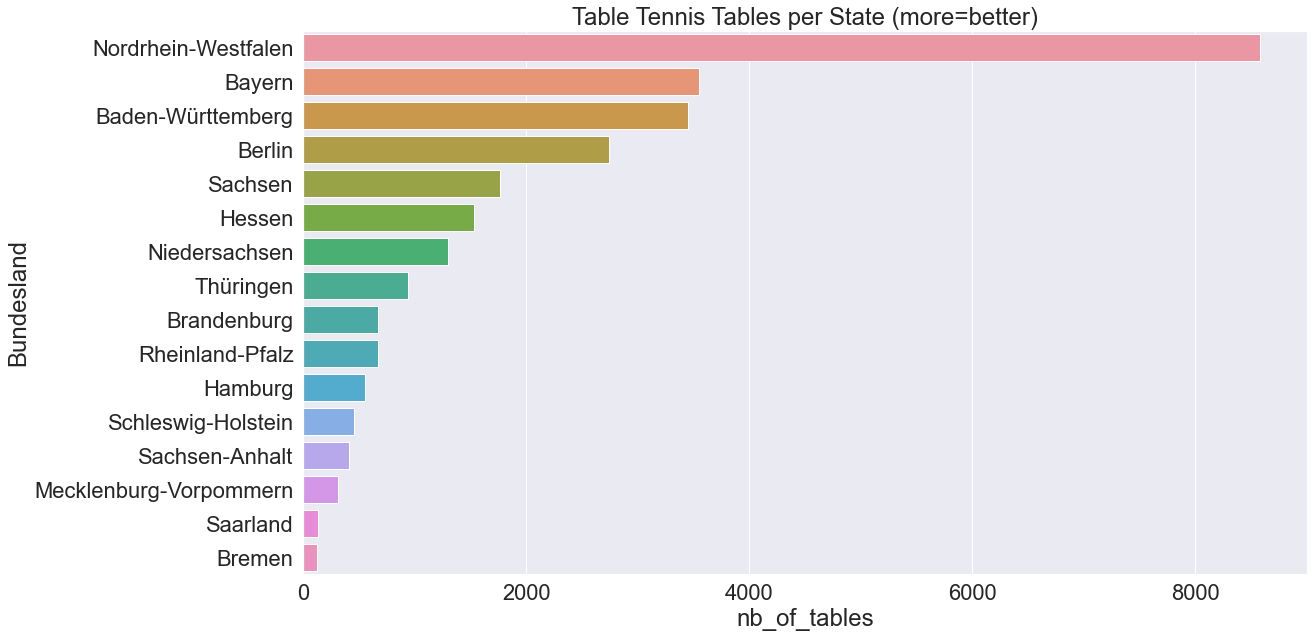

In [33]:
states.sort_values(by="nb_of_tables", ascending=False, inplace=True)


chart = sns.barplot(
    x=states["nb_of_tables"],
    y=states.index,
    orient="h"
).set_title(
    "Table Tennis Tables per State (more=better)"
)

### Relative number of public table tennis tables

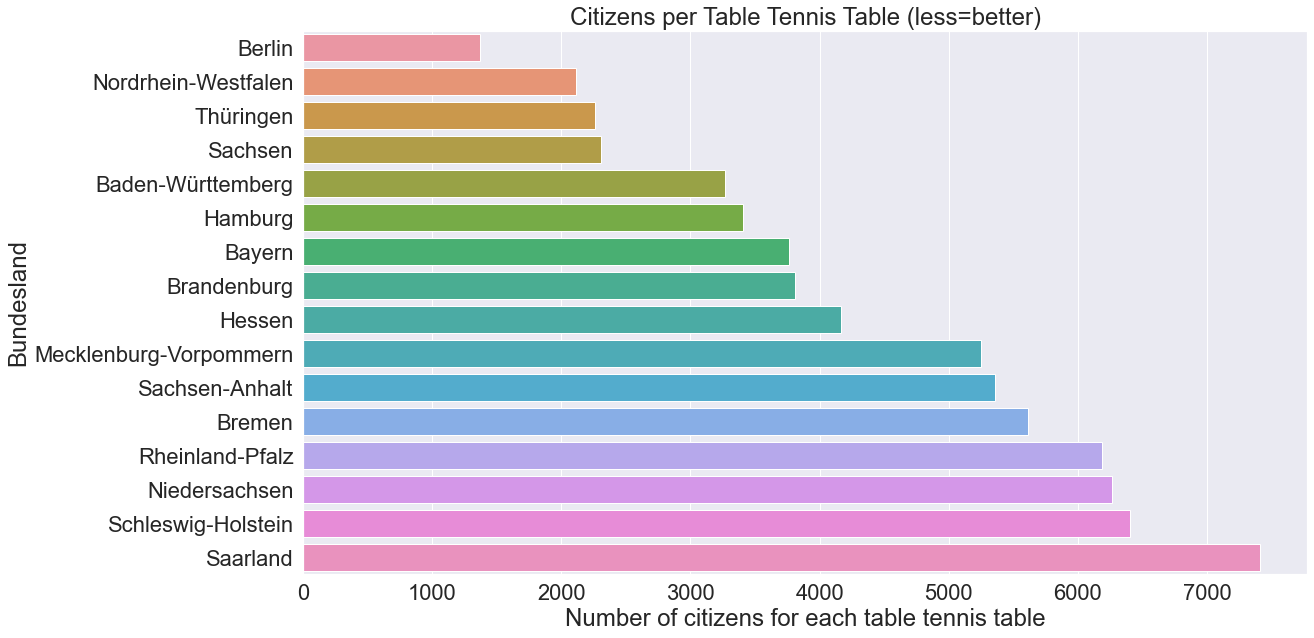

In [34]:
states["citizen_per_table"] = states["nb_of_citizens"] / states["nb_of_tables"]
states.sort_values(by="citizen_per_table", inplace=True)

chart = sns.barplot(
    x=states["citizen_per_table"],
    y=states.index,
    orient="h",
    
)
chart.set_title(
    "Citizens per Table Tennis Table (less=better)"
)
plt.xlabel("Number of citizens for each table tennis table")
plt.show()

## Analysis of most populous German cities

In [94]:
german_cities = {
    "Berlin": 3677472,
    "Hamburg": 1906411,
    "München": 1487708,
    "Köln": 1073096,
    "Frankfurt am Main": 759224,
    "Stuttgart": 626275,
    "Düsseldorf": 619477,
    "Leipzig": 601866,
    "Essen": 593085,
    "Dortmund": 588462,
    "Dresden": 486854,
}

cities = pd.DataFrame.from_dict(german_cities, orient="index", columns=["nb_of_citizens"])
cities

,nb_of_citizens
Berlin,3677472
Hamburg,1906411
München,1487708
Köln,1073096
Frankfurt am Main,759224
Stuttgart,626275
Düsseldorf,619477
Leipzig,601866
Essen,593085
Dortmund,588462


In [95]:
# Query overpass for each state.
for city_name, row in cities.iterrows():
    cities.at[city_name, "nb_of_tables"] = get_nb_of_table_tennis_tables(area_name=city_name)

cities

Found 2514 nodes, 224 ways and 0 relations in Berlin.
Found 493 nodes, 63 ways and 0 relations in Hamburg.
Found 625 nodes, 80 ways and 0 relations in München.
Found 467 nodes, 35 ways and 0 relations in Köln.
Found 158 nodes, 19 ways and 0 relations in Frankfurt am Main.
Found 165 nodes, 21 ways and 0 relations in Stuttgart.
Found 354 nodes, 59 ways and 0 relations in Düsseldorf.
Found 376 nodes, 58 ways and 0 relations in Leipzig.
Found 433 nodes, 65 ways and 0 relations in Essen.
Found 692 nodes, 141 ways and 0 relations in Dortmund.
Found 346 nodes, 43 ways and 0 relations in Dresden.


,nb_of_citizens,nb_of_tables
Berlin,3677472,2738.0
Hamburg,1906411,556.0
München,1487708,705.0
Köln,1073096,502.0
Frankfurt am Main,759224,177.0
Stuttgart,626275,186.0
Düsseldorf,619477,413.0
Leipzig,601866,434.0
Essen,593085,498.0
Dortmund,588462,833.0


### Absolute number of public table tennis tables

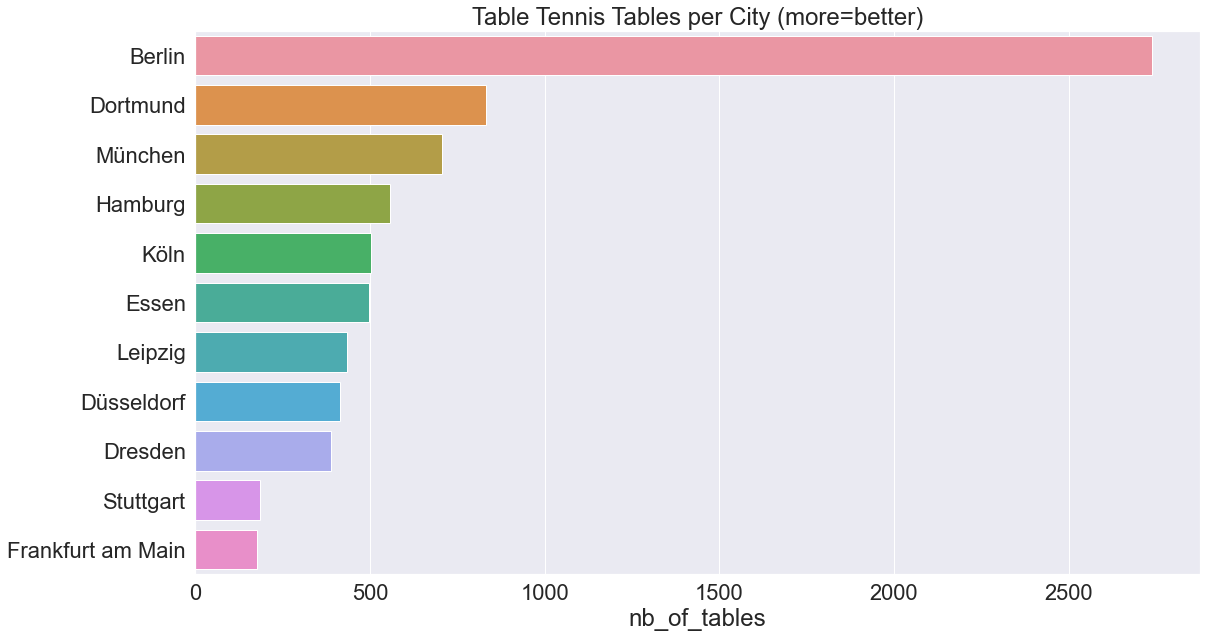

In [96]:
cities.sort_values(by="nb_of_tables", ascending=False, inplace=True)


chart = sns.barplot(
    x=cities["nb_of_tables"],
    y=cities.index,
    orient="h"
).set_title(
    "Table Tennis Tables per City (more=better)"
)

### Relative number of public table tennis tables

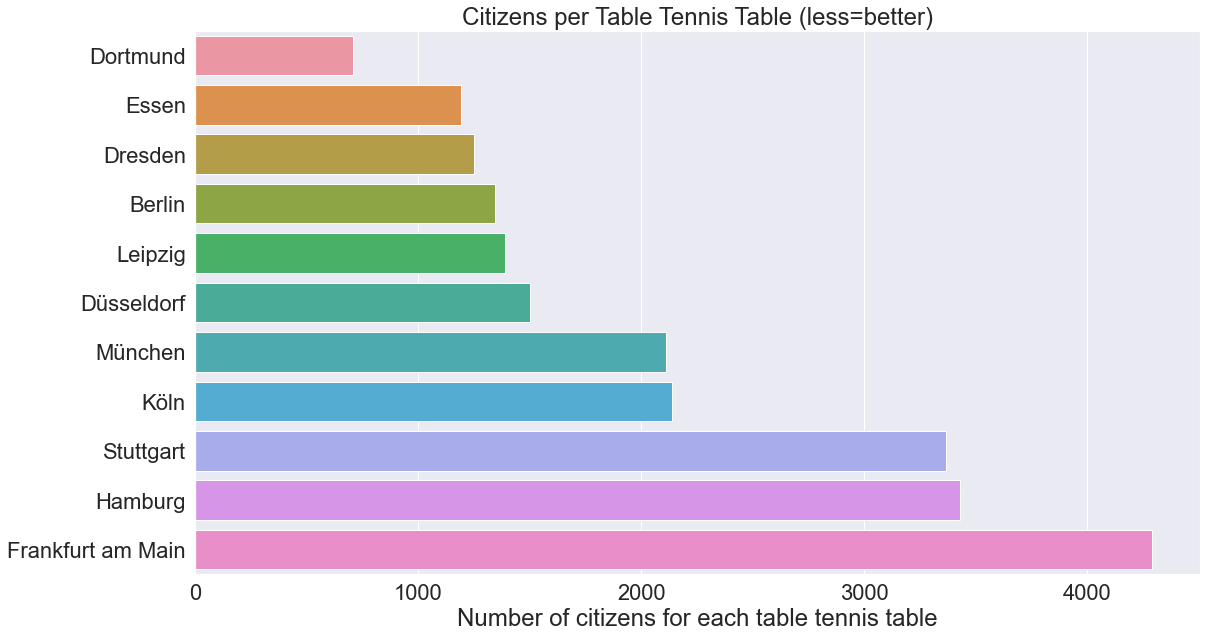

In [97]:
cities["citizen_per_table"] = cities["nb_of_citizens"] / cities["nb_of_tables"]
cities.sort_values(by="citizen_per_table", inplace=True)

chart = sns.barplot(
    x=cities["citizen_per_table"],
    y=cities.index,
    orient="h",
    
)
chart.set_title(
    "Citizens per Table Tennis Table (less=better)"
)
plt.xlabel("Number of citizens for each table tennis table")
plt.show()